In [41]:
from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations

## Урок 6. Взаимосвязь величин. Показатели корреляции. Корреляционный анализ. Проверка на нормальность.

**1. Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):**

```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```

**Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) найдите:**

1. ковариацию (смещённую и несмещённую) этих двух величин,
2. коэффициент корреляции Пирсона,
3. коэффициент корреляции Кендалла.

**Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.**

1. Смещённая ковариация

$$
cov_{biased} = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{x} \right) \cdot \left( y_i - \overline{y} \right)
$$

In [4]:
x = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
y = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

n = len(x)

x_mean = sum(x) / n
y_mean = sum(y) / n

s = 0

for i in range(n):
    s += (x[i] - x_mean) * (y[i] - y_mean)

cov_biased = s / n
cov_biased

9157.84

In [5]:
np.cov(x, y, ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

Несмещённая ковариация

$$
cov = \dfrac{1}{n-1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{x} \right) \cdot \left( y_i - \overline{y} \right)
$$

In [6]:
cov = s / (n - 1)
cov

10175.377777777778

In [7]:
np.cov(x, y, ddof=1)

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

2. Коэффициент корреляции Пирсона.

$$r_{XY} = \dfrac{\sigma_{XY}}{\sigma_X \cdot \sigma_Y}$$

In [15]:
DX = sum((x_i - x_mean)**2 for x_i in x) / (n - 1)
DY = sum((y_i - y_mean)**2 for y_i in y) / (n - 1)

sigm_X = DX ** 0.5
sigm_Y = DY ** 0.5

r = cov / (sigm_X * sigm_Y)
r

0.8874900920739162

In [16]:
np.corrcoef(x, y, ddof=1)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [50]:
stats.pearsonr(x, y)

(0.8874900920739164, 0.0006107546587257491)

Случайные величины $x$ и $y$ имеют 

3. Коэффициент корреляции Кендалла.

$$\tau = \dfrac{P - Q}{P + Q}$$

При таком подсчёте коэффициента корреляции Кендалла нужно чтобы выборки $x$ и $y$ не имели повторов. Проверим это.

In [24]:
len(set(x)) == n, len(set(y)) == n

(True, True)

Повторов нет.

In [32]:
def is_concordant(pair1: tuple, pair2: tuple) -> bool:
    """Являются ли две пары согласованными.
    """

    return (pair1[0] - pair2[0]) * (pair1[1] - pair2[1]) > 0

In [35]:
P = 0
Q = 0

for pair1, pair2 in combinations(zip(x, y), r=2):
    if is_concordant(pair1, pair2):
        P += 1
    else:
        Q += 1
        
P, Q

(43, 2)

In [36]:
t = (P - Q) / (P + Q)
t

0.9111111111111111

In [46]:
pd.DataFrame({'x': x, 'y': y}).corr(method='kendall')

,x,y
x,1.000000,0.911111
y,0.911111,1.000000


In [48]:
stats.kendalltau(x, y)

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

Коэффициент корреляции Кендалла близок к единице, значит случайные величины $x$ и $y$ имеют ранговую зависимость. Оценим зависимость выборок $x$ и $y$ визуально.

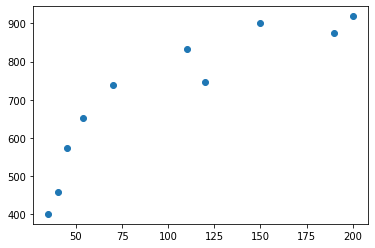

In [37]:
plt.scatter(x, y)
plt.show()

**Ответ: 1) $cov=9157.84$, $cov_{unbiased} = 10175$. 2) $r=0.8875$. 3) $\tau = 0.911$.**

**2. Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:**

```
131, 125, 115, 122, 131, 115, 107, 99, 125, 111
```

**Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.**

В данной задаче нам не известна дисперсия случайной величины, поэтому доверительный интервал будем с помощью t-статистики Стьюдента.

$$T(X) = \dfrac{\overline{X} - a}{\sigma_X / \sqrt{n}},$$

Доверительный интервал

$$
P \left( 
    \overline{X} - t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} 
    \leq a \leq
    \overline{X} + t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} 
\right) = p.
$$

In [2]:
X = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
p = 0.95

n = len(X)
mean = X.mean()
sigm = X.std(ddof=1)
alpha = 1 - p

n, mean, sigm

(10, 118.1, 10.54566788359614)

Статистика $T(X)$ имеет распределение Стьюдента. Найдём квантиль $t_{1-\alpha/2, \: n-1}$ и доверительный интервал.

In [5]:
t = stats.t.ppf(1 - alpha/2, df=n-1)
t

2.2621571627409915

In [7]:
L = mean - t * (sigm / np.sqrt(n))
U = mean + t * (sigm / np.sqrt(n))

L, U

(110.55608365158724, 125.64391634841274)

**Ответ: доверительный интервал матожидания случайной величины $P(110.56 \leq a \leq 125.64) = 0.95$.**

**3. Известно, что рост футболистов в сборной распределён нормально с известной дисперсией 25. На выборке объёма 27 выборочное среднее составило 174.2. Найдите доверительный интервал для математического ожидания с надёжностью 0.95.**

Задано $n = 27$, $D = 25$, $\overline{X} = 174.2$, $p = 0.95$. Доверительный интервал будем искать с помощью t-статистики нормального распределения.
$$T(X) = \dfrac{\overline{X} - a}{\sigma / \sqrt{n}},$$

Доверительный интервал

$$
P \left( 
    \overline{X} - t_{1 - \alpha/2} \cdot \dfrac{\sigma}{\sqrt{n}} 
    \leq a \leq
    \overline{X} + t_{1 - \alpha/2} \cdot \dfrac{\sigma}{\sqrt{n}} 
\right) = p.
$$

In [38]:
n = 27
p = 0.95
D = 25
mean = 174.2

sigm = D ** 0.5
alpha = 1 - p

t = stats.norm.ppf(1 - alpha/2)
t

1.959963984540054

In [39]:
L = mean - t * (sigm / np.sqrt(n))
U = mean + t * (sigm / np.sqrt(n))

L, U

(172.3140237765397, 176.08597622346028)

**Ответ: доверительный интервал матожидания случайной величины $P(172.31 \leq a \leq 176.09) = 0.95$.**

**4. Выберите тему для проектной работы по курсу Теории вероятностей и математической статистики и напишите ее в комментарии к Практическому заданию.**